# Atividade 1 - Pré-processamento (Transformação dos dados) - base de dados [Hotel Reservations Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

## Análise Descritiva

1. **Visualização de Dados**
   - Apresentar um mapa de calor (heatmap) entre todas as variáveis numéricas.

2. **Transformação de Dados**
   - Efetuar as devidas transformações nos atributos categóricos.

3. **Normalização de Dados**
   - Normalizar por Z-Score (Standard Scaler).

## Análise Agrupada

4. **Group-by**
   - Utilizando Group-by, responder as seguintes perguntas:
     1. Apresentar os valores mínimo, máximo e média do preço das diárias (`avg_price_per_room`) agrupados por tipo de quarto (`room_type_reserved`).
     2. Apresentar o valor médio de adultos e crianças hospedados em 2017 e 2018.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

from sklearn.preprocessing  import LabelEncoder

## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.feature_selection import RFE, SequentialFeatureSelector as SFS
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.pipeline import Pipeline
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [3]:
df = pd.read_csv('Hotel Reservations.csv')
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# 1. Apresentar um mapa de calor (heatmap) entre todas as variáveis numéricas

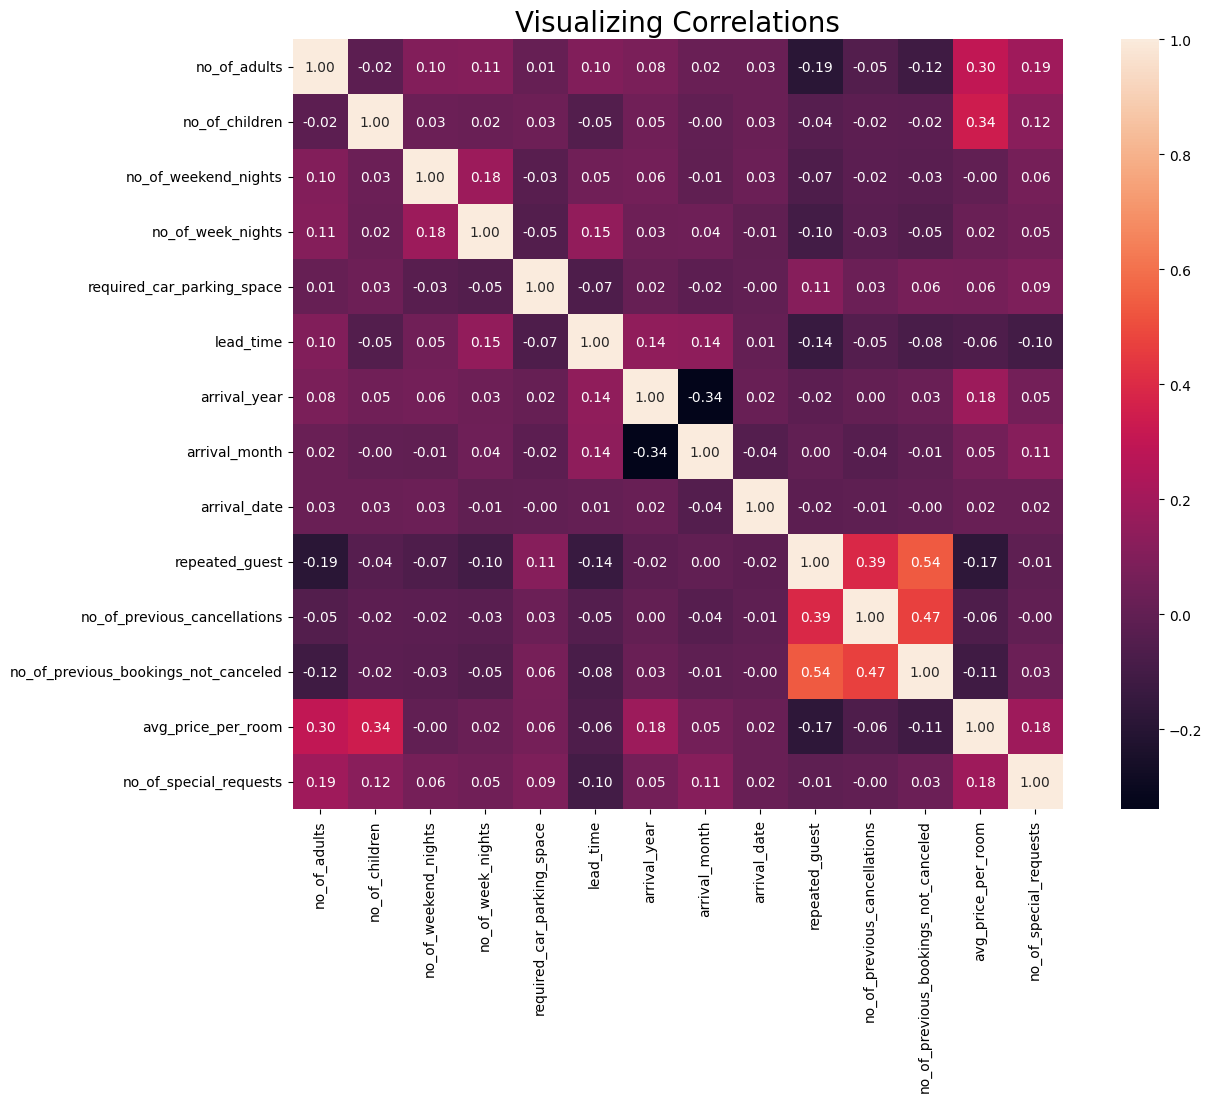

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), square=True, annot=True, fmt=".2f")
plt.title("Visualizing Correlations", size = 20)
plt.show()

# 4.A Apresentar os valores mínimo, máximo e média do preço das diárias ``avg_price_per_room`` agrupados por tipo de quarto ``room_type_reserved``.

In [6]:
# Calculate the minimum, maximum, and average price of the daily rates grouped by room type
grouped_data = df.groupby('room_type_reserved')['avg_price_per_room'].agg(['min', 'max', 'mean']).reset_index()

# Rename columns for clarity
grouped_data.columns = ['Room Type', 'Minimum Price', 'Maximum Price', 'Average Price']

grouped_data

,Room Type,Minimum Price,Maximum Price,Average Price
0,Room_Type 1,0.0,540.00,95.918532
1,Room_Type 2,0.0,284.10,87.848555
2,Room_Type 3,0.0,130.00,73.678571
3,Room_Type 4,0.0,375.50,125.287317
4,Room_Type 5,0.0,250.00,123.733623
5,Room_Type 6,0.0,349.63,182.212836
6,Room_Type 7,0.0,306.00,155.198291


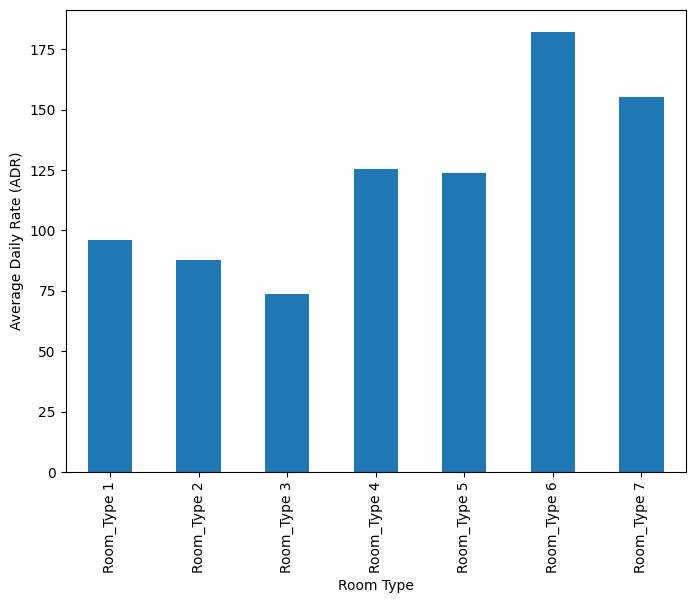

In [7]:
room_type_prices = df.groupby('room_type_reserved')['avg_price_per_room'].mean()

room_type_prices.plot(kind='bar', figsize=(8, 6),)
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 4.2 Apresentar os valor médio de adultos e crianças hospedados em 2017 e 2018.

In [8]:
# Agrupar por 'arrival_year' e calcular a média de 'no_of_adults' e 'no_of_children'
grouped_data = df.groupby('arrival_year')[['no_of_adults', 'no_of_children']].mean().reset_index()

# Renomear colunas para clareza
grouped_data.columns = ['Ano de Chegada', 'Média de Adultos', 'Média de Crianças']

grouped_data

,Ano de Chegada,Média de Adultos,Média de Crianças
0,2017,1.759902,0.065705
1,2018,1.863580,0.113941


# 2. Efetuar as devidas transformações nos atributos categóricos

In [9]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

# pré-processamento

In [10]:
df = df.drop('Booking_ID', axis =1)
df = df.drop('arrival_year', axis = 1)

Vou dropar o Booking ID e o ano da reserva para evitar overfitting, já que o ID poderia acabar indicando uma relação entre as reservas e o ano é uma feature que não vai se repetir nos anos seguintes, não sendo útil para a identificação de cancelamentos futuros

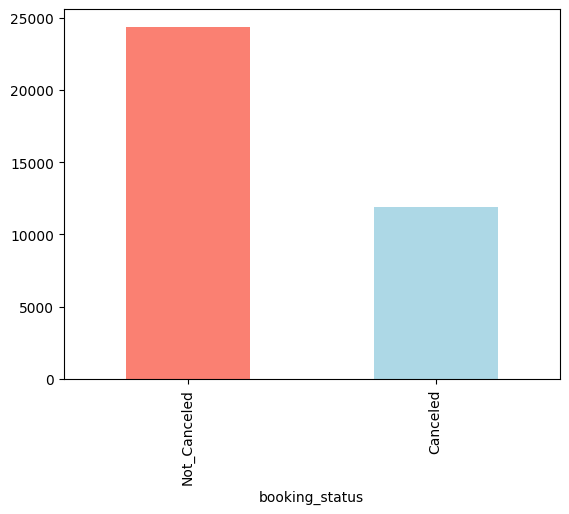

In [11]:
# Target variable
df.booking_status.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['booking_status']= label_encoder.fit_transform(df['booking_status'])
  
df['booking_status'].unique()

array([1, 0])

In [13]:
# Make a copy of the original DataFrame to perform edits on
#df_tmp = df.copy()

In [14]:
#names of columns
columns = list(df.columns)
columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [15]:
# Check for missing values
#df_tmp.isna().sum()

# Analisar as variáveis to encode

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [17]:
for categorical_feature in categorical_columns:
  print(f'{categorical_feature}: {df[categorical_feature].unique()}')

type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [18]:
columns_to_encode = [ 'market_segment_type', 'type_of_meal_plan', 'room_type_reserved']
encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

# Applying one-hot encoding
#df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  int64  
 11  repeated_guest 

In [20]:
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,4,11,4,0,0,0,94.50,0,0
5,2,0,0,2,1,0,0,346,9,13,4,0,0,0,115.00,1,0
6,2,0,1,3,0,0,0,34,10,15,4,0,0,0,107.55,1,1
7,2,0,1,3,0,0,3,83,12,26,4,0,0,0,105.61,1,1
8,3,0,0,4,0,0,0,121,7,6,3,0,0,0,96.90,1,1
9,2,0,0,5,0,0,3,44,10,18,4,0,0,0,133.44,3,1


# Rescaling the data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler_cols=['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
scaler = StandardScaler()
ajuste = scaler.fit(df[scaler_cols])
df[scaler_cols] = ajuste.transform(df[scaler_cols])

In [22]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.298893,-0.26147,0.217401,-0.144803,0,-0.178819,0,1.614896,0.839242,-1.555662,3,-0.16221,-0.063393,-0.087456,-1.095033,-0.78814,1
1,0.298893,-0.26147,1.365993,0.563972,3,-0.178819,0,-0.933701,1.164990,-1.098013,4,-0.16221,-0.063393,-0.087456,0.092806,0.48376,1
2,-1.628975,-0.26147,1.365993,-0.853578,0,-0.178819,0,-0.980250,-1.766747,1.419055,4,-0.16221,-0.063393,-0.087456,-1.237528,-0.78814,0
3,0.298893,-0.26147,-0.931190,-0.144803,0,-0.178819,0,1.463610,-0.789501,0.503757,4,-0.16221,-0.063393,-0.087456,-0.097567,-0.78814,0
4,0.298893,-0.26147,0.217401,-0.853578,3,-0.178819,0,-0.433291,-1.115250,-0.525952,4,-0.16221,-0.063393,-0.087456,-0.254312,-0.78814,0


In [23]:
#plt.figure(figsize=(20, 20))
#sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), square=True, annot=True, fmt=".2f")
#plt.title("Visualizing Correlations", size = 20)
#plt.show()

# Optional

In [29]:
# Everything except target variable
X = df.drop("booking_status", axis=1)

# Target variable
y = df['booking_status']

## train and test split

In [30]:
# Random seed for reproducibility
np.random.seed(55)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use


## Model choices

We'll be using the following and comparing their results.

1. Decision Tree - DecisionTreeClassifier()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()



In [31]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: target training data
    y_test: target test data
    """
    np.random.seed(42)  # Random seed for reproducible results
    model_metrics = {}  # Dictionary to keep all model metrics

    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train) # Fit the model to the data
        y_pred = model.predict(X_test)  # Predictions
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)  
        precision = precision_score(y_test, y_pred)  
        f1 = f1_score(y_test, y_pred)  

        # Store metrics in the dictionary
        model_metrics[name] = {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1 Score": f1
        }

    return model_metrics

## Model comparison

In [33]:
# Call the function
model_metrics = fit_and_evaluate(models=models,
                                 X_train=X_train,
                                 X_test=X_test,
                                 y_train=y_train,
                                 y_test=y_test)

# Convert model_metrics to DataFrame for better visualization
model_metrics_df = pd.DataFrame(model_metrics).T
# Display the DataFrame
print(model_metrics_df)

               Accuracy    Recall  Precision  F1 Score
Decision Tree  0.867815  0.890960   0.914609  0.902630
KNN            0.854859  0.902385   0.888319  0.895297
Random Forest  0.905720  0.943275   0.921480  0.932250


## feature selection

In [51]:
# Definindo os classificadores
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Técnicas de seleção de características
feature_selection_techniques = {
    "Mutual Information": SelectKBest(mutual_info_classif, k=9),
    "ANOVA": SelectKBest(f_classif, k=9),
    "Drop Correlated": DropCorrelatedFeatures(threshold=0.8, method='pearson'),
    # Add SmartCorrelatedGroups após 
}

## Configuração do pipeline de avaliação
def evaluate_pipeline(X_train, X_test, y_train, y_test, classifier, selector):
    pipeline = Pipeline([
        ('selector', selector),
        ('classifier', classifier)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred, average='binary'),
        "Precision": precision_score(y_test, y_pred, average='binary'),
        "F1 Score": f1_score(y_test, y_pred, average='binary')
    }

In [52]:
results = {}

for clf_name, clf in classifiers.items():
    for fs_name, fs in feature_selection_techniques.items():
        key = f"{clf_name} + {fs_name}"
        results[key] = evaluate_pipeline(X_train, X_test, y_train, y_test, clf, fs)

# Convertendo resultados em DataFrame para visualização
results_df = pd.DataFrame(results).T
print(results_df)

                                    Accuracy    Recall  Precision  F1 Score
Decision Tree + Mutual Information  0.863818  0.887753   0.911880  0.899655
Decision Tree + ANOVA               0.853480  0.880136   0.904242  0.892026
Decision Tree + Drop Correlated     0.870986  0.893766   0.916547  0.905013
KNN + Mutual Information            0.862991  0.905191   0.896565  0.900858
KNN + ANOVA                         0.856099  0.908398   0.885329  0.896715
KNN + Drop Correlated               0.854859  0.902385   0.888319  0.895297
Random Forest + Mutual Information  0.889318  0.922229   0.917265  0.919740
Random Forest + ANOVA               0.885596  0.924434   0.910563  0.917446
Random Forest + Drop Correlated     0.905720  0.942874   0.921811  0.932224


### Optional2 only for studies purpose
Hyperparameter tuning and cross-validation Next steps to be taken:

1.    Tune model hyperparameters
2.    Perform cross-validation
3.    Plot ROC curves
4.    Make a confusion matrix
5.    Get precision, recall and F1-score metrics
6.    Find the most important model features

### 1. Tune model hyperparameters
Tune  by hand

In [53]:
train_scores = []

test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 11) # 1 to 10

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 85.49%


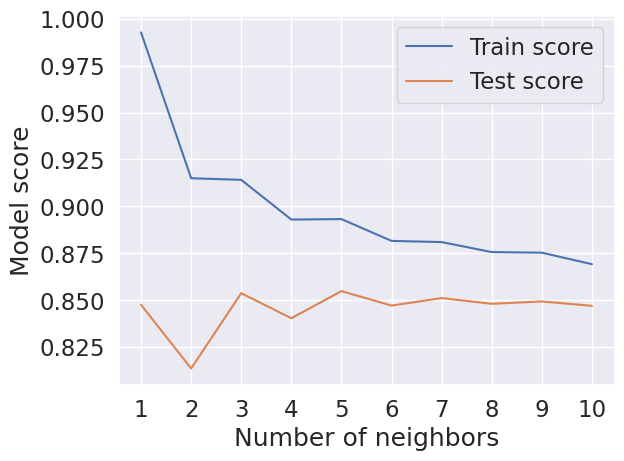

In [54]:
#visualizing the scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

- Tuning models with with RandomizedSearchCV


In [55]:
# Different LogisticRegression hyperparameters
#log_reg_grid = {"C": np.logspace(-4, 4, 20),
#                "solver": ["liblinear"]}

rf_grid = {
    'n_estimators': np.arange(10, 100, 3),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30)),  # Maximum number of levels in tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required at each leaf node
    'max_features': [ 'sqrt', 'log2'],  # Number of features to consider at every split
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

Now we tune RandomForestClassifier using RandomizedSearchCV

In [56]:
# Setup random seed
np.random.seed(90)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])},
                   verbose=True)

In [57]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 79,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 24,
 'bootstrap': False}

In [58]:
# Evaluate the randomized search random forest model acc
rs_rf.score(X_test, y_test)

0.9046175051688491

- Tuning a model with GridSearchCV

- Evaluating a classification model

We want:

1.    ROC curve and AUC score - plot_roc_curve()
2.    Confusion matrix - confusion_matrix()
3.    Classification report - classification_report()
4.    Precision - precision_score()
5.    Recall - recall_score()
6.    F1-score - f1_score()


In [59]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

In [60]:
y_preds

array([1, 1, 0, ..., 1, 1, 1])

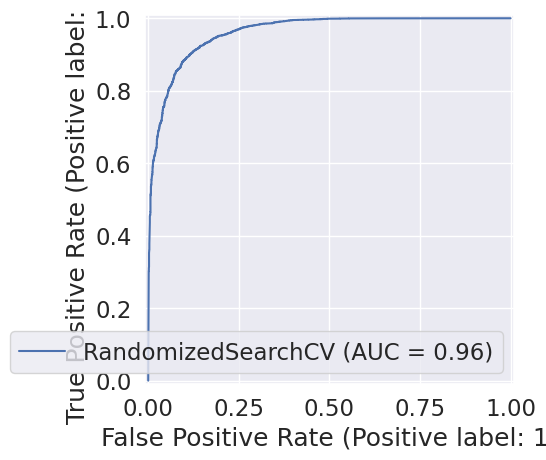

In [61]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test)

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds)

0.8816313365131445

- confusion matrix

In [63]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1859  407]
 [ 285 4704]]


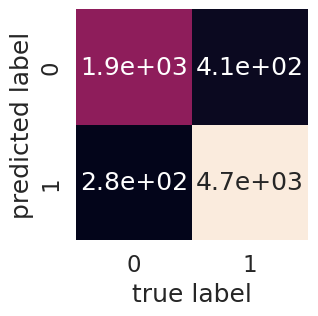

In [64]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [65]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2266
           1       0.92      0.94      0.93      4989

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [66]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 79,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 24,
 'bootstrap': False}